In [34]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [35]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [60]:
# LOAD DATA
# array shapes = [mono phi, mono r, nclusters, ncrystals]
f = open('../instance_files/mD_vT_vars', 'rb')
result = pickle.load(f)
f.close()

#convert dict keys to variables
locals().update(result)

In [61]:
def convert_to_m(var):
    ''' convert axes to meters from micrometers'''
    return var*1E-6
agg_as = convert_to_m(agg_as)
agg_bs = convert_to_m(agg_bs)
agg_cs = convert_to_m(agg_cs)
Dmaxs = convert_to_m(Dmaxs)

In [62]:
rho_b = 916.8  # bulk density of ice [kg/m3]
m_spheroid = 4/3*np.pi*agg_as**2*agg_cs*rho_b # kg
m = np.mean(m_spheroid, axis=2)  # average over 300 clusters
D = np.mean(Dmaxs, axis=2)  # average over 300 clusters

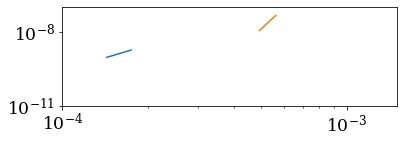

In [82]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

#ax.plot(D[0,0,:], m[0,0,:]) # plates
#ax.plot(D[1,0,:], m[1,0,:])  # columns
ax.scatter(Dmaxs[0,0,])
ax.set_ylim([1E-11, 1E-7])
ax.set_xlim([1E-4, 1.5E-3])
ax.set_yscale('log')
ax.set_xscale('log')


In [65]:
D.shape

(2, 1, 2)

In [83]:
D[0,0,:], m[0,0,:]

(array([0.00014365, 0.00017485]), array([9.27936659e-10, 1.82481950e-09]))